### One Hot Encoder and Label Encoder

#### IRIS dataset

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
iris=pd.read_csv("iris.csv")

In [ ]:
iris.head(5)

In [ ]:
iris.drop("Unnamed: 0",axis=1)

In [ ]:
sns.heatmap(iris.isnull())
plt.show()

In [ ]:
iris.isnull().sum()

In [ ]:
#iris_data=iris[["Species"]]

In [ ]:
iris["Species"].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
la.fit(iris["Species"])

In [ ]:
iris["Species"]=la.transform(iris["Species"])

In [ ]:
iris["Species"]

#### Loan data

In [ ]:
loan=pd.read_csv("loan.csv")
loan.head(5)

In [ ]:
loan.isnull().sum()

In [ ]:
(loan.isnull().sum().sum()/(loan.shape[0]*loan.shape[1]))*100

In [ ]:
loan.drop(columns=["Credit_History"],inplace=True)

In [ ]:
loan.shape

In [ ]:
loan.dropna(inplace=True)

In [ ]:
loan.shape

In [ ]:
loan.isnull().sum()

In [ ]:
loan_data=loan[["Gender","Married"]]
loan_data

In [ ]:
loan['Gender'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
la.fit(loan["Gender"])

In [ ]:
loan["Gender"]=la.transform(loan["Gender"])

In [ ]:
loan["Gender"]

In [ ]:
loan['Married'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
la.fit(loan["Married"])

In [ ]:
loan["Married"]=la.transform(loan["Married"])

In [ ]:
loan["Married"]

In [ ]:
en_data=loan[['Gender','Married']]
en_data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_loan=loan[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]

In [ ]:
data_loan

In [ ]:
pd.get_dummies(data_loan).info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(data_loan).toarray()
ar

In [ ]:
pd.DataFrame(ar,columns=["Gender","Married","Education_Graduate","Self_Employed_Yes","Property_Area_Rural","Property_Area_Urban","Loan_Status_Y"])

In [ ]:
churn=pd.read_csv("TelcoCustomerChurn.csv")

In [ ]:
churn.head(5)

In [ ]:
churn.isnull().sum()

In [ ]:
churn["Contract"].unique()

In [ ]:
churn["Dependents"].unique()

In [ ]:
churn_data=churn[['gender','Dependents']]

In [ ]:
churn_data

In [ ]:
pd.get_dummies(churn_data).info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(churn_data).toarray()
ar

In [ ]:
pd.DataFrame(ar,columns=["gender_Female","Dependents"])

In [ ]:
la=pd.DataFrame({"Contract":["Month-to-month","One year","Two year"]})

In [ ]:
la

In [ ]:
la=LabelEncoder()
la.fit(churn["Contract"])

In [ ]:
churn["Contract"]=la.transform(churn["Contract"])

In [ ]:
churn["Contract"]

In [ ]:
churn.describe()

In [ ]:
import seaborn as sns
sns.boxplot(x="MonthlyCharges",data=churn)
plt.show()

### Bank Data

In [3]:
bank=pd.read_csv("bank.csv")

In [5]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
bank_col=bank["job"].unique()

In [16]:
bank_col=pd.DataFrame({"job":["admin.","technician","services","management","retired","blue-collar","unemployed",
"entrepreneur","housemaid","unknown","self-employed","student"]})

In [34]:
bank_col.head(5)

,job
0,admin.
1,technician
2,services
3,management
4,retired


In [42]:
from sklearn.preprocessing import LabelEncoder
la_bank=LabelEncoder()
la_bank.fit(bank["job"])

LabelEncoder()

In [44]:
bank["job"]=la_bank.transform(bank["job"])

In [46]:
bank["job"]

0        0
1        0
2        9
3        7
4        0
        ..
11157    1
11158    7
11159    9
11160    9
11161    9
Name: job, Length: 11162, dtype: int32

In [48]:
bank.describe()

,age,job,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3.225132,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,0.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,1.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,4.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,7.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,11.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


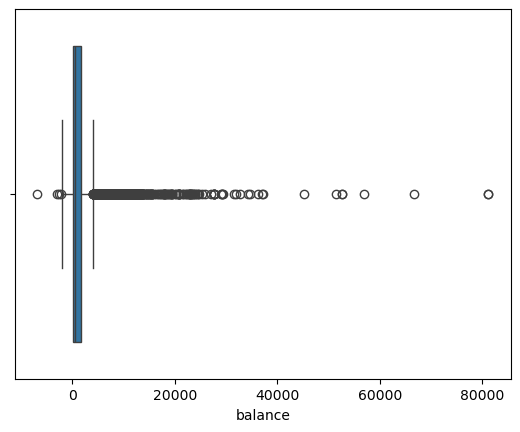

In [59]:
sns.boxplot(x="balance",data=bank)
plt.show()

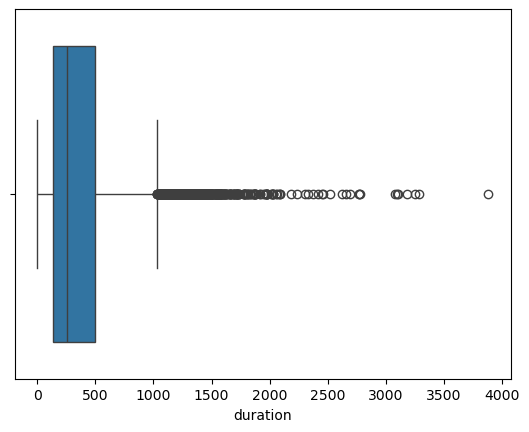

In [61]:
sns.boxplot(x="duration",data=bank)
plt.show()

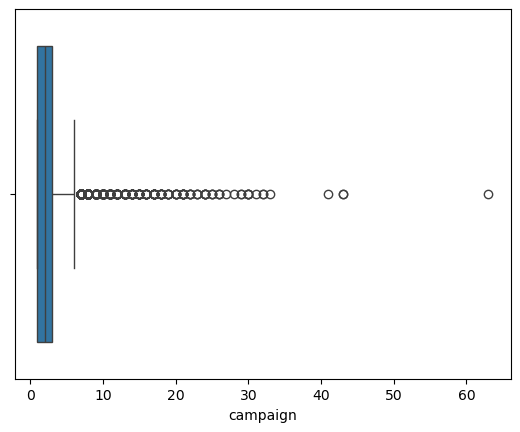

In [63]:

sns.boxplot(x="campaign",data=bank)
plt.show()